In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import Normalizer

In [46]:
# Get the data
data= pd.read_excel(r'C:\Users\parag\Desktop\ironhack\lab\mid_project\regression\regression_data.xls')
data.columns = data.columns.str.lower().str.replace(' ','_')
data.drop_duplicates()
data = data.set_index('id')
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat  

In [48]:
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [49]:
# Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals
numerical = data.select_dtypes(include=np.number)
categoricals = data.select_dtypes(include=np.object)
print('Numerical Data into dataframe:')
display(numerical.head())
print('Categorical Data into dataframe:')
display(categoricals.head())

Numerical Data into dataframe:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Categorical Data into dataframe:


""
id
7129300520
6414100192
5631500400
2487200875
1954400510


In [50]:
#correlations 
corr_data = numerical.corr() # With standard method 'pearson'
corr_matrix = corr_data.corr()
corr_matrix


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.770734,0.802270,-0.086216,0.381884,-0.187081,0.039088,-0.177312,0.653199,0.699921,0.343151,0.415035,-0.153262,-0.457247,-0.175393,0.304149,0.687981,-0.077316,0.554256
bathrooms,0.770734,1.000000,0.927738,-0.046600,0.732398,-0.132165,0.094447,-0.483623,0.918404,0.911336,0.137501,0.749503,-0.202059,-0.577330,-0.187606,0.454491,0.865278,-0.032937,0.705184
sqft_living,0.802270,0.927738,1.000000,0.032017,0.562265,-0.074584,0.224157,-0.360313,0.934473,0.926517,0.290145,0.579035,-0.171690,-0.556166,-0.146146,0.414179,0.942080,0.049586,0.833919
sqft_lot,-0.086216,-0.046600,0.032017,1.000000,-0.107360,-0.138780,-0.110233,-0.088628,-0.006879,0.104436,-0.180889,0.096561,-0.139830,-0.354115,-0.376831,0.391876,0.087422,0.939465,-0.131851
floors,0.381884,0.732398,0.562265,-0.107360,1.000000,-0.146840,-0.122104,-0.655682,0.715168,0.754211,-0.430157,0.787649,-0.197711,-0.380825,-0.107360,0.381038,0.565625,-0.102357,0.391451
waterfront,-0.187081,-0.132165,-0.074584,-0.138780,-0.146840,1.000000,0.601127,0.037557,-0.073884,-0.113883,0.092255,-0.204671,0.127942,0.110479,-0.074625,-0.235748,-0.063515,-0.136461,0.188348
view,0.039088,0.094447,0.224157,-0.110233,-0.122104,0.601127,1.000000,0.055538,0.183518,0.072008,0.410128,-0.200499,0.116356,0.113353,-0.033243,-0.276494,0.217816,-0.114486,0.467871
condition,-0.177312,-0.483623,-0.360313,-0.088628,-0.655682,0.037557,0.055538,1.000000,-0.489045,-0.501051,0.320762,-0.667536,-0.016729,0.219366,0.029156,-0.365729,-0.399300,-0.093114,-0.191944
grade,0.653199,0.918404,0.934473,-0.006879,0.715168,-0.073884,0.183518,-0.489045,1.000000,0.944693,0.070485,0.699480,-0.211690,-0.541397,-0.080485,0.432254,0.934216,0.010242,0.815368
sqft_above,0.699921,0.911336,0.926517,0.104436,0.754211,-0.113883,0.072008,-0.501051,0.944693,1.000000,-0.091242,0.737034,-0.211076,-0.637763,-0.211532,0.570948,0.930012,0.124201,0.720674


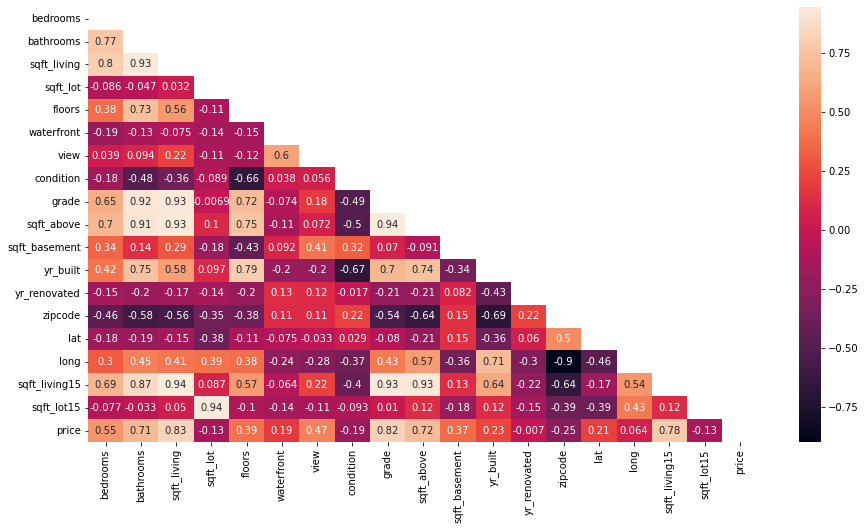

In [51]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True) 
plt.show()

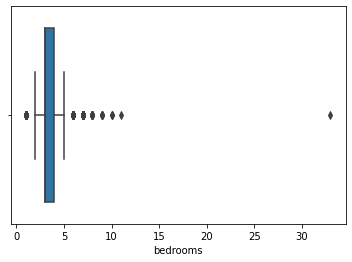

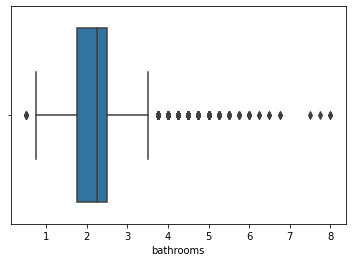

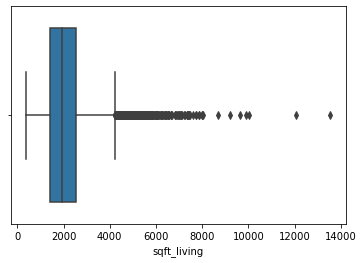

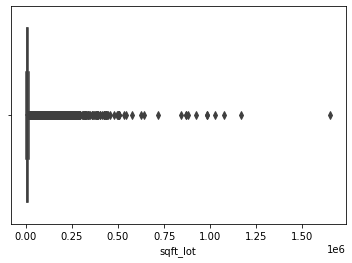

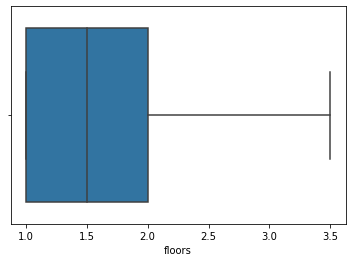

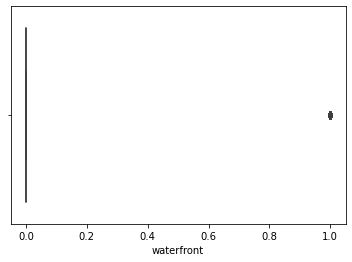

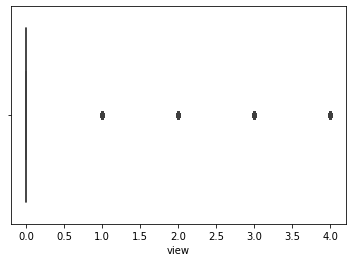

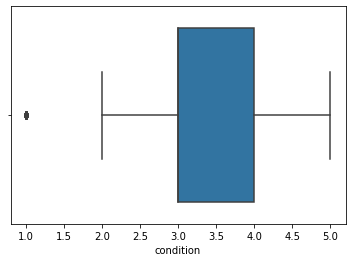

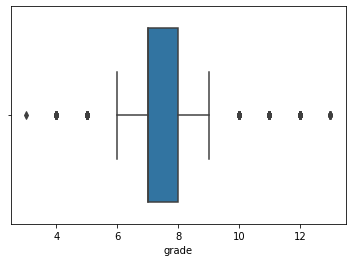

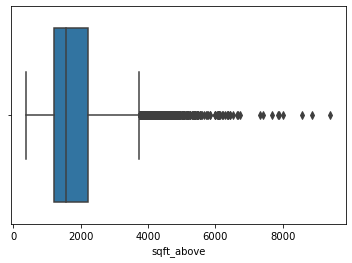

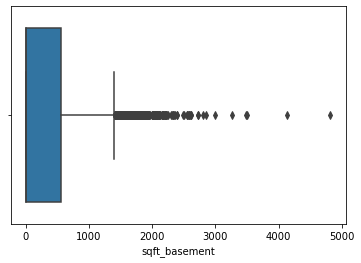

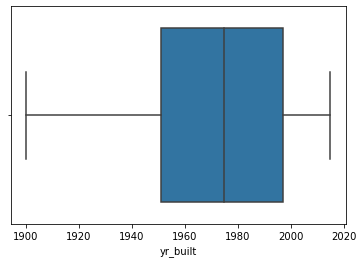

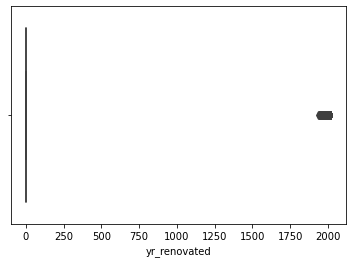

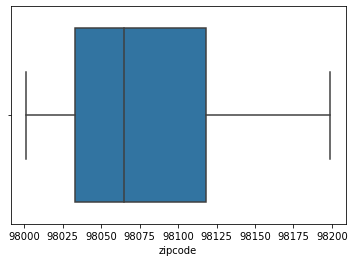

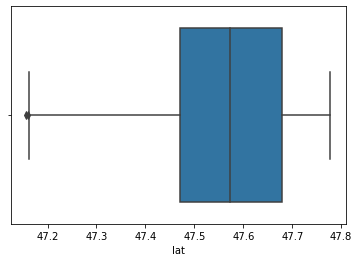

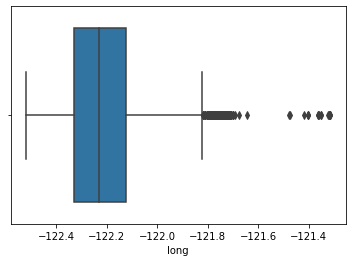

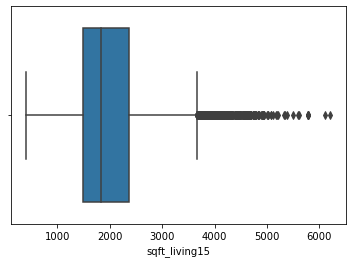

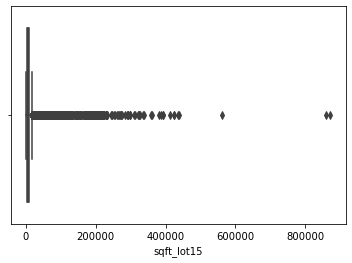

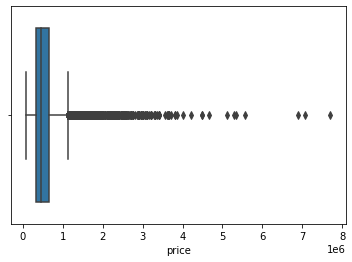

In [52]:
# let's check for outliers 
for col in numerical.columns:
    sns.boxplot(x=numerical[col])
    plt.show()

In [53]:
for col in numerical.columns:
    iqr = np.percentile(numerical[col],75) - np.percentile(numerical[col],25) 
    upper_limit = np.percentile(numerical[col],75) + 1.5*iqr
    lower_limit = np.percentile(numerical[col],25) - 1.5*iqr
    numerical_wo = numerical[(numerical[col] > lower_limit) & (numerical[col] < upper_limit)]
numerical_wo.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [54]:
#Normalize numarical
transformer = Normalizer() # init Normalizer
transformer.fit(numerical_wo) # fit the training data
with open('transformer.pkl', 'wb') as file: # save it in a file 
    pickle.dump(transformer, file)

In [55]:
# read transformer object
with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

X_normalized = transformer.transform(numerical_wo)
X_normalized = pd.DataFrame(X_normalized, columns=numerical_wo.columns)

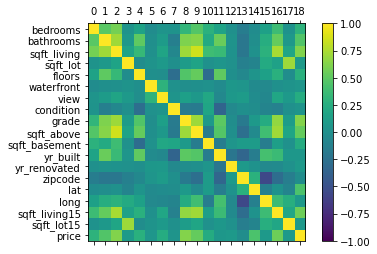

In [56]:
correlations= numerical_wo.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(numerical)
ax.set_yticklabels(numerical_wo)
plt.show()

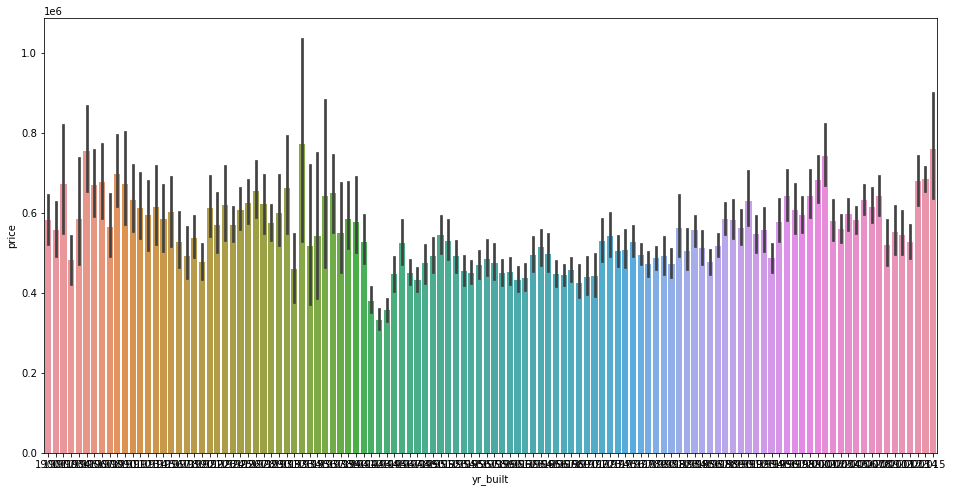

In [57]:
plt.figure(figsize=(16,8))

sns.barplot(x="yr_built", y="price", data=numerical)
plt.show()

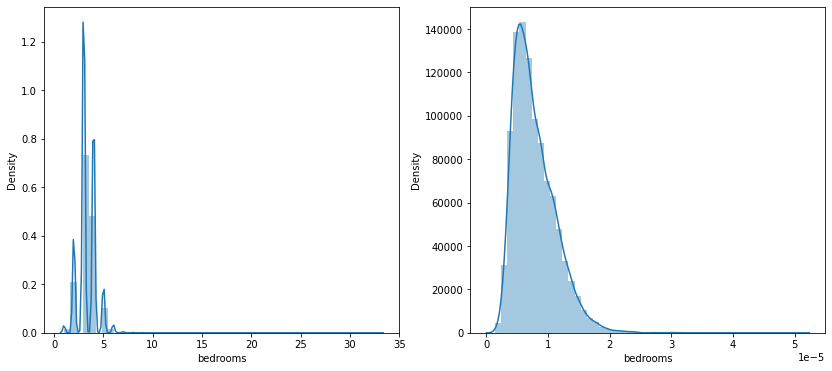

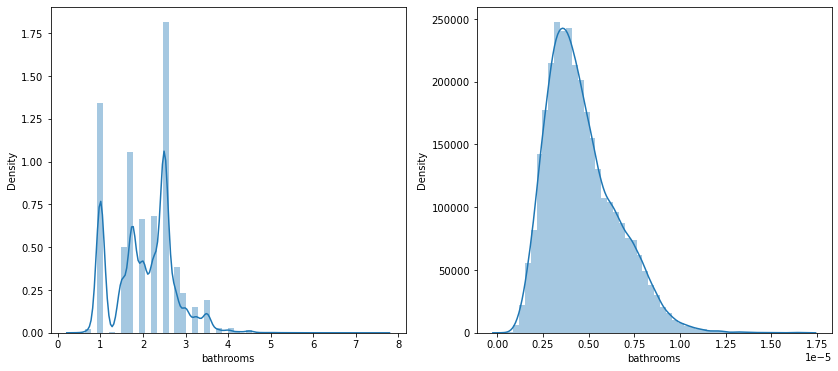

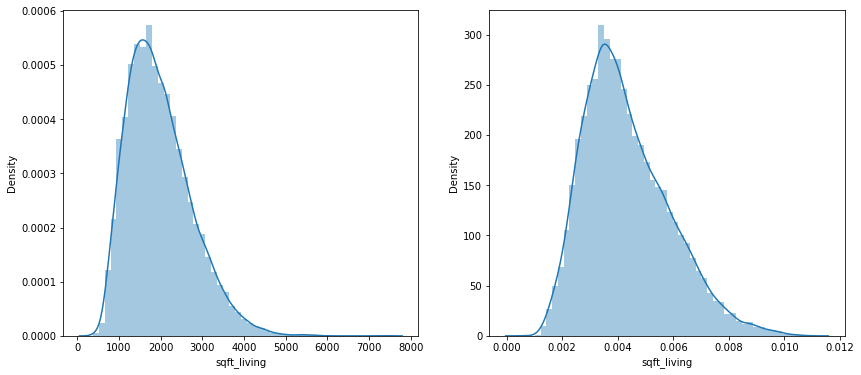

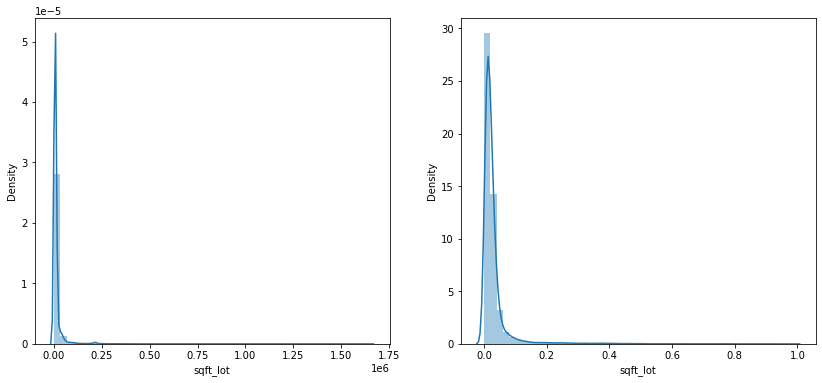

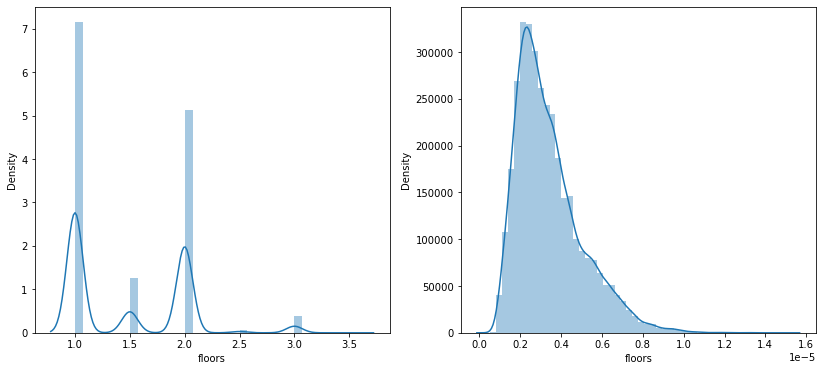

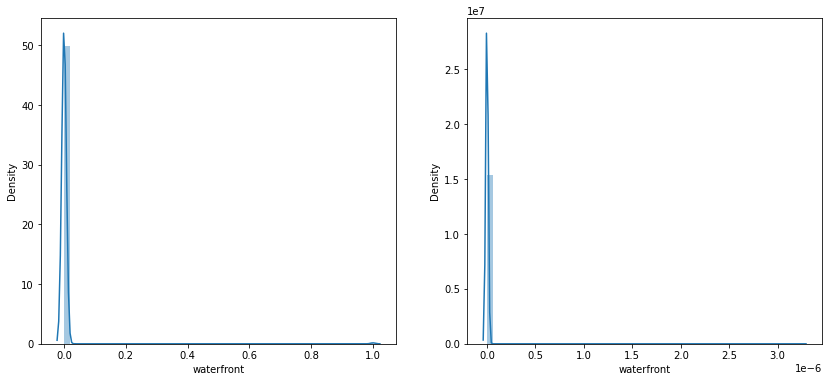

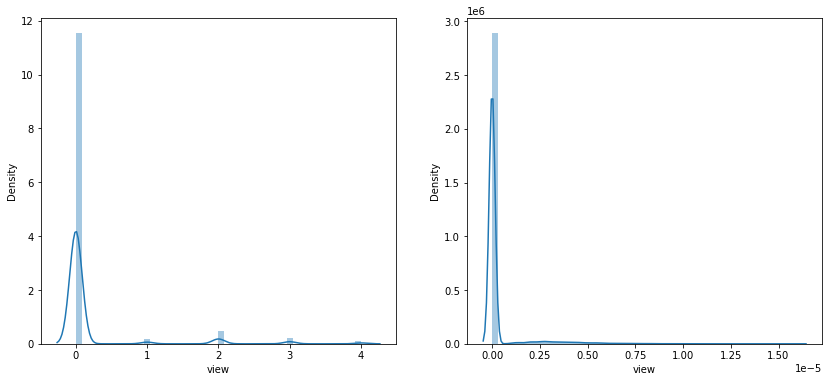

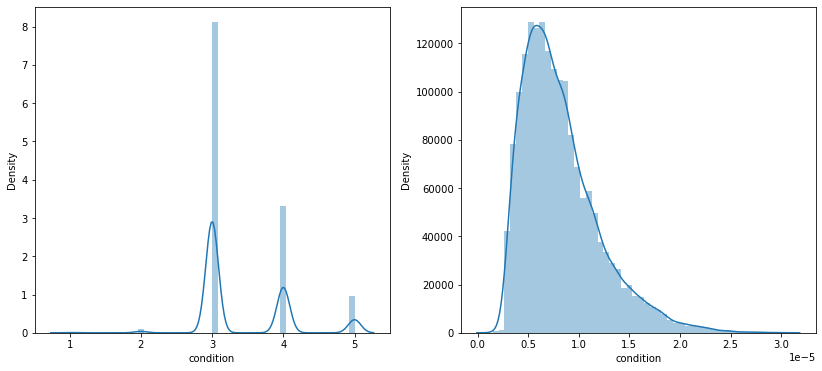

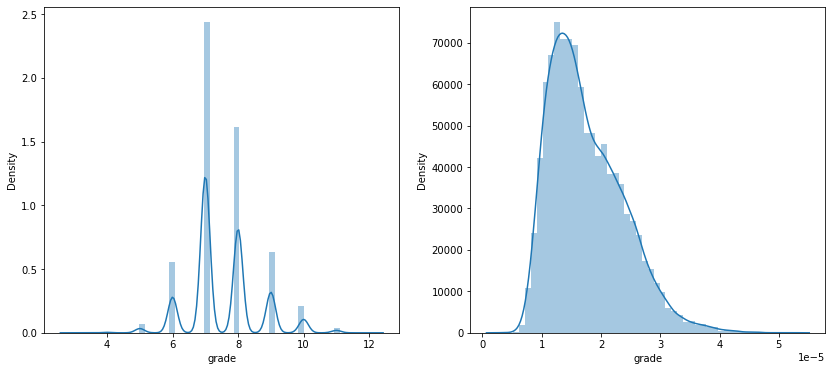

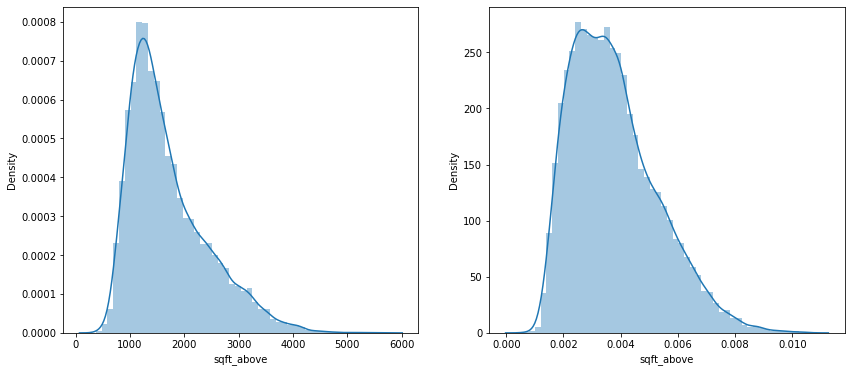

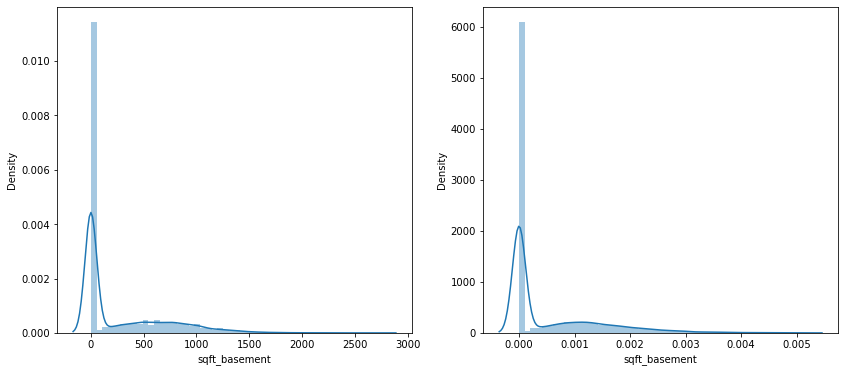

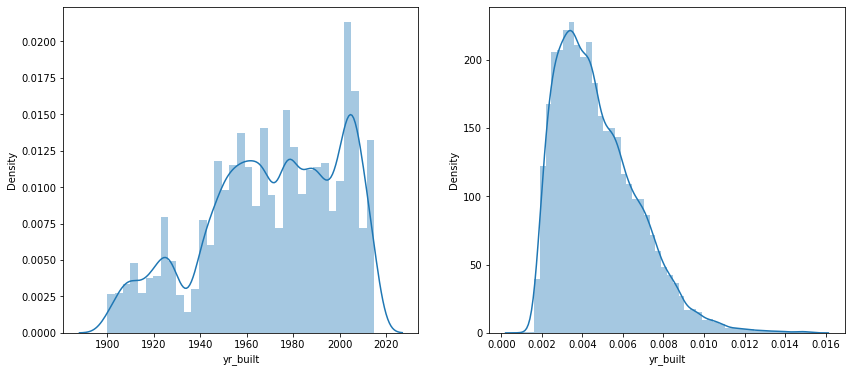

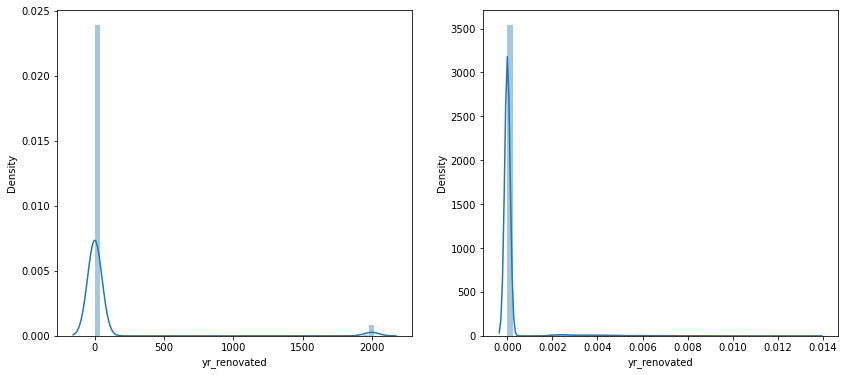

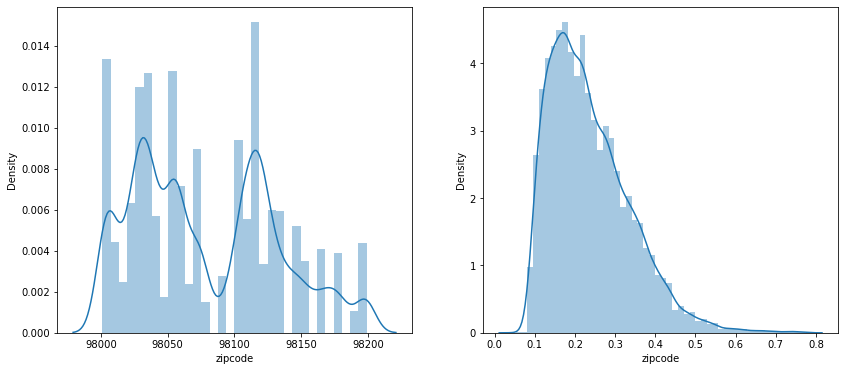

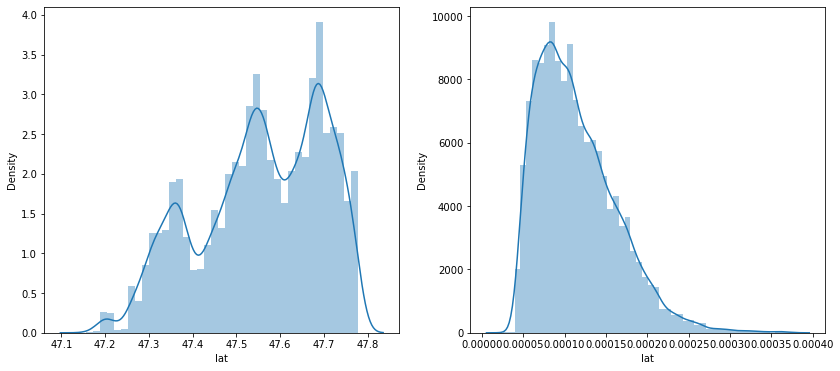

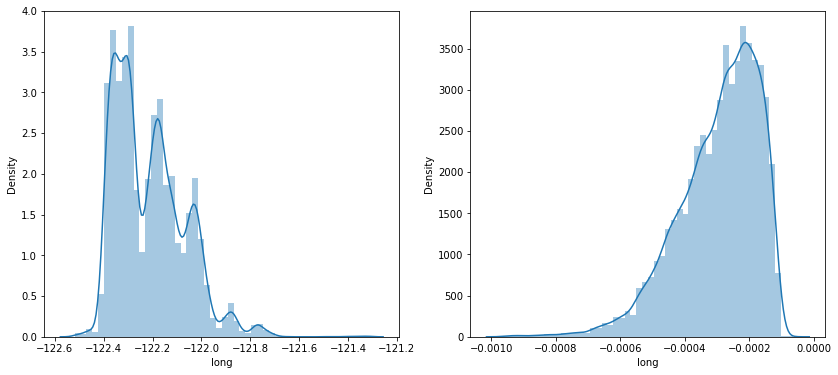

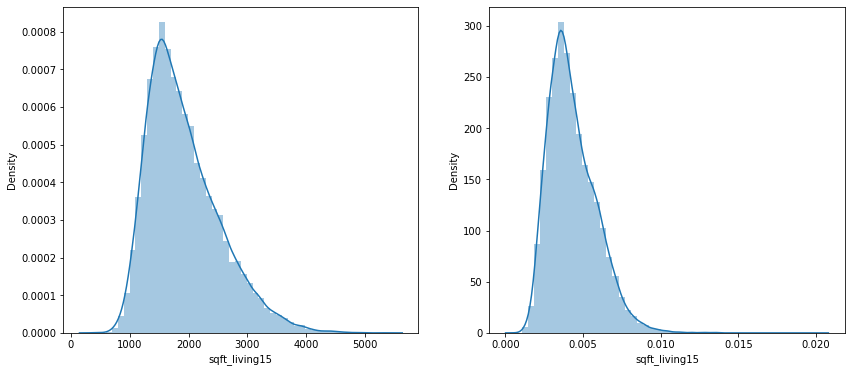

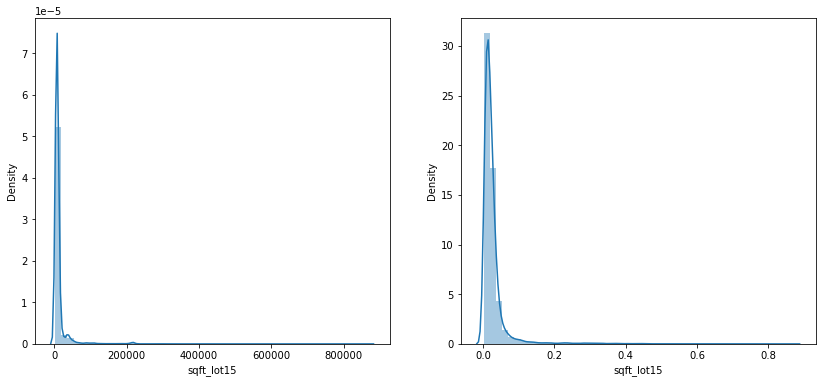

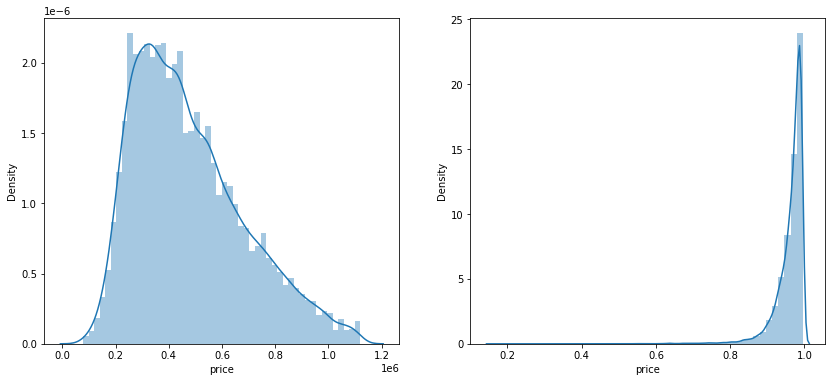

In [58]:
# Print difference between unfiltered data and normalized distributions
for col in X_normalized.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    sns.distplot(ax=axs[0], a=numerical_wo[col])
    sns.distplot(ax=axs[1], a=X_normalized[col])
    plt.show()

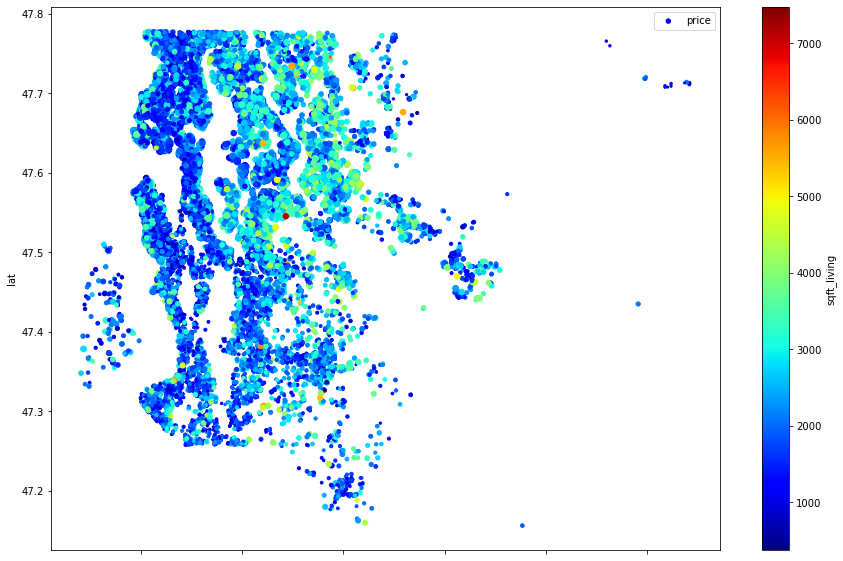

In [59]:
numerical_wo.plot(kind='scatter', x='long', y='lat', alpha=1.0, s=numerical_wo['price']/30000, label='price',
figsize=(15, 10), c='sqft_living', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [60]:
#for col in numerical_wo.columns:
   # sns.stripplot( x='price',y=numerical_wo[col],data=numerical_wo, size=5)
#plt.show()

In [61]:
# X-y split.
X = numerical.drop(['price'], axis=1)#effective_to_date is target
y = numerical['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
#LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.705635610705509

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.70599154, 0.71310806, 0.70782278, 0.6835027 , 0.70389137])

In [64]:
print('Coefficients: \n', model.coef_)
print('Predictions Value :', model.predict(X_test))
predictions = model.predict(X_test)

Coefficients: 
 [-3.64595294e+04  4.40562864e+04  1.06537365e+02  9.71521632e-02
  1.00691216e+04  6.05532332e+05  5.08259550e+04  2.85191133e+04
  1.00612661e+05  6.27400884e+01  4.37972764e+01 -2.70108722e+03
  2.03135591e+01 -5.63132976e+02  5.82806043e+05 -2.08334931e+05
  2.86185849e+01 -4.21471393e-01]
Predictions Value : [ 81596.63879737 382174.59458183 198678.67549148 ... 437105.36599868
 554520.51263791 365412.91509705]


In [65]:
print('Regration score :',r2_score(y_test, predictions))
print('Mean absolute erroe :',mean_absolute_error(y_test, predictions))
print('Mean squared error: ',mean_squared_error(y_test, predictions,squared= False))

Regration score : 0.6858080545096988
Mean absolute erroe : 125639.5603781266
Mean squared error:  204111.17063352105


<AxesSubplot:xlabel='price'>

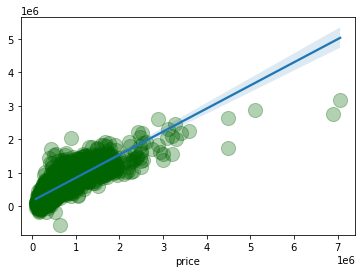

In [66]:
preds=model.predict(X_test)
sns.regplot(y_test, preds, data=numerical, fit_reg=True, scatter_kws={'color': 'darkgreen', 'alpha': 0.3, 's': 200})

In [67]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [68]:
score=knn.score(X_test, y_test)
score

0.47739249340159906

In [69]:
preds=knn.predict(X_test)
preds

array([171171., 416100., 601040., ..., 309300., 552321., 332230.])

In [71]:
print('Regration score :',r2_score(y_test, preds))
print('Mean absolute erroe :',mean_absolute_error(y_test, preds))
print('Mean squared error: ',mean_squared_error(y_test, preds,squared= False))

Regration score : 0.47739249340159906
Mean absolute erroe : 158925.15651234568
Mean squared error:  263243.14550393895


<AxesSubplot:xlabel='price'>

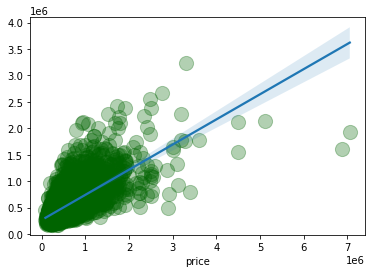

In [72]:
sns.regplot(y_test, preds, data=numerical, fit_reg=True, scatter_kws={'color': 'darkgreen', 'alpha': 0.3, 's': 200})

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [78]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
score=dtr.score(X_test, y_test)
score

0.7792518600361993

<AxesSubplot:xlabel='price'>

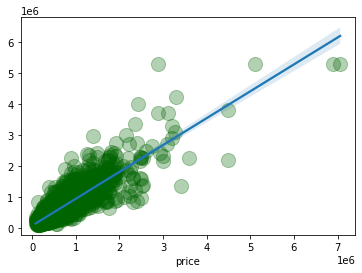

In [80]:
preds=dtr.predict(X_test)
sns.regplot(y_test, preds, data=numerical, fit_reg=True, scatter_kws={'color': 'darkgreen', 'alpha': 0.3, 's': 200})

In [81]:
print('Regration score :',r2_score(y_test, preds))
print('Mean absolute erroe :',mean_absolute_error(y_test, preds))
print('Mean squared error: ',mean_squared_error(y_test, preds,squared= False))

Regration score : 0.7792518600361993
Mean absolute erroe : 96801.62862654321
Mean squared error:  171087.30144158096


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y): 
    algos = { 
        'linear regression': {
        'model': LinearRegression(), 
        'params': {
            'normalize': [True, False] 
            }
        },
        'decision_tree': { 
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            } 
        },
        'KNeighborsRegressor':{
        'model':KNeighborsRegressor(),
        'params':{
                'n_neighbors': [3] 
            }
        }
        
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)

        gs.fit(X,y)

        scores.append({

            "model": algo_name,

            "best_score": gs.best_score_,

            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [83]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear regression,0.702973,{'normalize': True}
1,decision_tree,0.750187,"{'criterion': 'mse', 'splitter': 'best'}"
2,KNeighborsRegressor,0.495351,{'n_neighbors': 3}
